# k means clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:

data=pd.read_csv(r'Mall_Customers.csv',index_col=0)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [3]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
data['Gender']=data.Gender.map({'Male':0,"Female":1})

In [5]:
data.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [6]:
x=data.values[:,[2,3]]

Text(0, 0.5, 'WSSE')

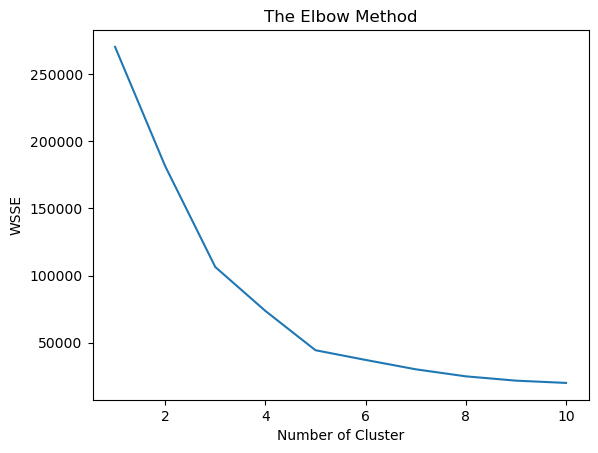

In [7]:
from sklearn.cluster import KMeans

wsse=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=10)
    kmeans.fit(x)
    wsse.append(kmeans.inertia_)
plt.plot(range(1,11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WSSE')
    

In [8]:
kmeans=KMeans(n_clusters=5,random_state=10)
y_pred=kmeans.fit_predict(x)

In [9]:
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [10]:
data['clusters']=y_pred

In [11]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,0,19,15,39,4
2,0,21,15,81,2
3,1,20,16,6,4
4,1,23,16,77,2
5,1,31,17,40,4


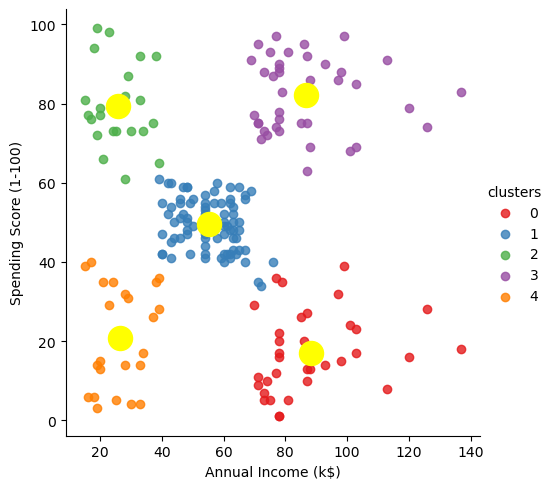

In [12]:
sns.lmplot(data=data , x ='Annual Income (k$)',y='Spending Score (1-100)',
        fit_reg=False, #No Regression Line
        hue="clusters",palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
        s=300, c='yellow')
plt.show()

In [18]:
data['clusters']=data.clusters.map({0:'Standard',1:'Sensible',2:'Target',3:'Careless',4:'Care Full'})
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,0,19,15,39,Care Full
2,0,21,15,81,Target
3,1,20,16,6,Care Full
4,1,23,16,77,Target
5,1,31,17,40,Care Full
...,...,...,...,...,...
196,1,35,120,79,Careless
197,1,45,126,28,Standard
198,0,32,126,74,Careless


In [14]:
data.dtypes

Gender                     int64
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
clusters                  object
dtype: object

In [15]:
data_new=data[data['clusters']=='Target']


In [16]:
data_new

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
2,0,21,15,81,Target
4,1,23,16,77,Target
6,1,22,17,76,Target
8,1,23,18,94,Target
10,1,30,19,72,Target
12,1,35,19,99,Target
14,1,24,20,77,Target
16,0,22,20,79,Target
18,0,20,21,66,Target


In [17]:
data_new.to_excel(r'finaldata.xlsx',index=True)